# Starting to explore eqcorrscan

## Started off by making a quakeml file for a small subset of the Endeavour catalog

Following the tutorial at this link to start:

https://eqcorrscan.readthedocs.io/en/latest/tutorials/quick_start.html

In [14]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from eqcorrscan.utils.catalog_utils import filter_picks

### Read in the quakeml file

In [71]:
# Round trip
from obspy.core.event import read_events
cat = read_events('endquakes.xml')
cat

In [73]:
cat

10 Event(s) in Catalog:
2016-07-01T06:07:03.682000Z | +47.942, -129.092 | 0.10 Mw
2016-07-01T08:27:04.552000Z | +47.934, -129.082 | 0.23 Mw
2016-07-01T09:04:32.483000Z | +47.946, -129.107 | 0.26 Mw
2016-07-01T10:35:41.749000Z | +47.962, -129.083 | 0.51 Mw
2016-07-01T10:40:27.893000Z | +47.961, -129.079 | 0.45 Mw
2016-07-02T03:15:22.540000Z | +47.949, -129.091 | 0.49 Mw
2016-07-02T08:34:43.350000Z | +48.027, -129.081 | 1.28 Mw
2016-07-02T08:50:28.301000Z | +47.937, -129.108 | 0.76 Mw
2016-07-02T08:52:12.696000Z | +47.944, -129.103 | 0.12 Mw
2016-07-02T08:52:23.050000Z | +47.941, -129.098 | 0.15 Mw

## It runs! But what is this warning I'm getting?

In [76]:
from eqcorrscan import Tribe
client = Client("IRIS")
tribe = Tribe().construct(
    method="from_client", lowcut=4.0, highcut=15.0, samp_rate=50.0, length=6.0,
    filt_order=4, prepick=0.5, client_id=client, catalog=cat, data_pad=20.,
    process_len=21600, min_snr=3.0, parallel=True)
print(tribe)

Pick for KEMF.EHE has no phase hint given, you should not use this template for cross-correlation re-picking!
Pick for KEMF.EHZ has no phase hint given, you should not use this template for cross-correlation re-picking!
Pick for KEMO.EHE has no phase hint given, you should not use this template for cross-correlation re-picking!
Pick for KEMO.EHZ has no phase hint given, you should not use this template for cross-correlation re-picking!
Pick for NCHR.EHE has no phase hint given, you should not use this template for cross-correlation re-picking!
Pick for KEMF.EHE has no phase hint given, you should not use this template for cross-correlation re-picking!
Pick for KEMF.EHZ has no phase hint given, you should not use this template for cross-correlation re-picking!
Pick for KEMO.EHE has no phase hint given, you should not use this template for cross-correlation re-picking!
Pick for KEMO.EHZ has no phase hint given, you should not use this template for cross-correlation re-picking!
Pick for N

Tribe of 10 templates


Template 2016_07_01t08_27_04: 
	 5 channels;
	 lowcut: 4.0 Hz;
	 highcut: 15.0 Hz;
	 sampling rate 50.0 Hz;
	 filter order: 4; 
	 process length: 21600.0 s


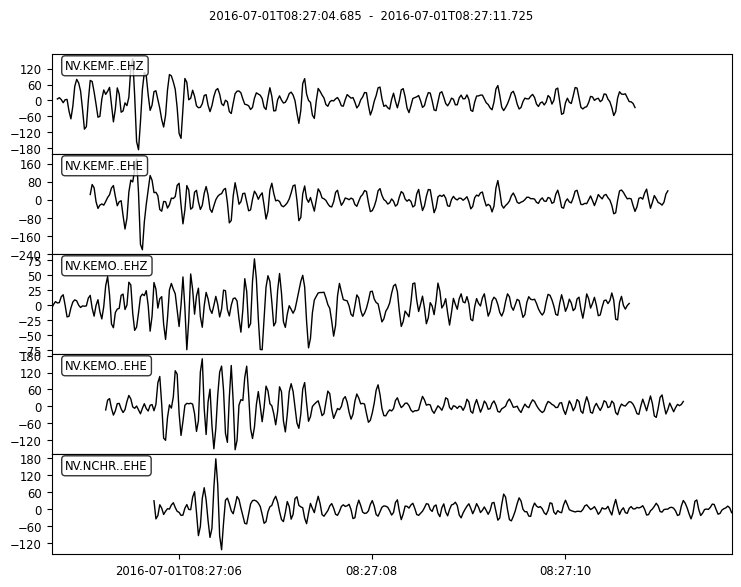

In [78]:
print(tribe[1])
fig = tribe[1].st.plot(equal_scale=False, size=(800, 600))